In [10]:
import pandas as pd
from surprise import SVD, SVDpp, NMF
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, GridSearchCV
import matplotlib.pyplot as plt

In [11]:

data = Dataset.load_builtin('ml-100k')

In [12]:
model_svd = SVD()
result = cross_validate(model_svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
SVD_result = pd.DataFrame.from_dict(result).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9379  0.9385  0.9339  0.9230  0.9213  0.9369  0.9235  0.9382  0.9334  0.9195  0.9306  0.0074  
MAE (testset)     0.7366  0.7383  0.7341  0.7242  0.7256  0.7391  0.7244  0.7396  0.7363  0.7250  0.7323  0.0063  
Fit time          0.83    0.83    0.86    0.83    0.84    0.84    0.84    0.85    0.84    0.85    0.84    0.01    
Test time         0.04    0.04    0.04    0.04    0.10    0.04    0.04    0.04    0.04    0.04    0.04    0.02    


In [13]:
model_svdpp = SVDpp()
result_svdpp = cross_validate(model_svdpp, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
SVDPP_result = pd.DataFrame.from_dict(result_svdpp).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVDpp on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9240  0.9170  0.9072  0.9160  0.9065  0.9218  0.9104  0.9124  0.9230  0.9081  0.9146  0.0064  
MAE (testset)     0.7226  0.7185  0.7105  0.7197  0.7141  0.7246  0.7128  0.7185  0.7236  0.7154  0.7180  0.0045  
Fit time          16.23   16.41   16.19   16.18   16.09   16.35   16.37   17.03   17.33   15.94   16.41   0.41    
Test time         1.37    1.41    1.38    1.37    1.39    1.42    1.39    1.64    1.38    1.35    1.41    0.08    


In [14]:
model_nmf = NMF()
result_nmf = cross_validate(model_nmf, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
NMF_result = pd.DataFrame.from_dict(result_nmf).mean(axis=0)

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9603  0.9613  0.9635  0.9683  0.9564  0.9394  0.9641  0.9599  0.9384  0.9470  0.9558  0.0100  
MAE (testset)     0.7529  0.7575  0.7566  0.7597  0.7554  0.7396  0.7588  0.7562  0.7384  0.7407  0.7516  0.0081  
Fit time          1.29    1.32    1.32    1.27    1.32    1.33    1.33    1.35    1.33    1.37    1.32    0.03    
Test time         0.03    0.03    0.09    0.03    0.03    0.03    0.09    0.03    0.03    0.03    0.04    0.02    


In [15]:
Final_result = pd.DataFrame(columns=['SVD', 'SVDpp', 'NMF'])
Final_result['SVD'] = SVD_result
Final_result['SVDpp'] = SVDPP_result
Final_result['NMF'] = NMF_result
Final_result

,SVD,SVDpp,NMF
test_rmse,0.930620,0.914629,0.955842
test_mae,0.732317,0.718040,0.751576
fit_time,0.842101,16.412741,1.322689
test_time,0.042590,1.408601,0.042194


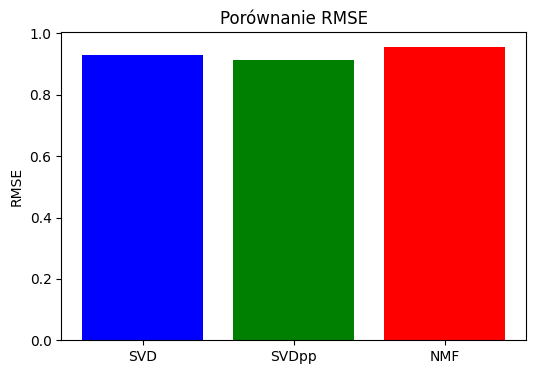

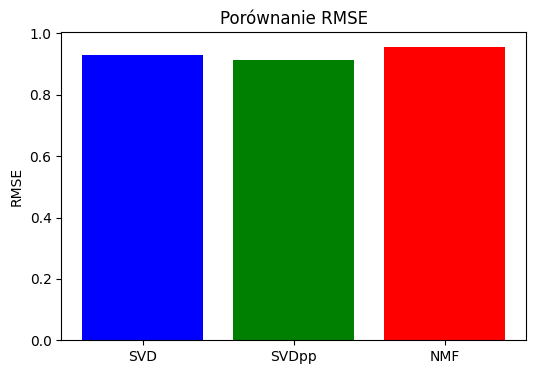

In [16]:
plt.figure(figsize=(6, 4))
plt.bar(Final_result.columns, Final_result.loc['test_rmse'], color=['blue', 'green', 'red'])
plt.title('Porównanie RMSE')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(Final_result.columns, Final_result.loc['test_rmse'], color=['blue', 'green', 'red'])
plt.title('Porównanie RMSE')
plt.ylabel('RMSE')
plt.show()